In [1]:
from solver import Solver
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Configuration
h = 0.01
dt = 0.001
nx = nz = 200
v0 = 1.5
nt = 2000
f0 = 10
t0 = 0.1
model = np.ones((nx + 1, nz + 1)) * v0
sources_xz = np.array([
    [1, 50],
    [1, 150]
])
receivers_xz = np.array([
    [180, 50],
    [180, 150]
])
sol = Solver(model, h, dt, nt, t0, f0, sources_xz, receivers_xz)

CFL number is 0.15


In [3]:
## Propagation
save_nt = [200, 400, 800, 1200, 1600, 1800]
sol.step(save_nt=save_nt)

[]

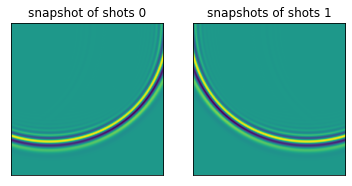

In [4]:
wave = sol.wavefield
wave = sol.wavefield
# Plot snapshots
fig = plt.figure()
ax = fig.add_subplot(121)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title(f'snapshot of shots 0')
ax.imshow(wave[3][0])
ax = fig.add_subplot(122)
ax.imshow(wave[3][1])
ax.set_title(f'snapshots of shots 1')
ax.set_yticks([])
ax.set_xticks([])

In [5]:
## Configurations 2
sources_xz = np.array([
    [1, 100]
])
rx = np.arange(0, 200)
receivers_xz = np.zeros((200, 2), dtype=int)
receivers_xz[:, 0] = 2
receivers_xz[:, 1] = rx
sol = Solver(model, h, dt, nt, t0, f0, sources_xz, receivers_xz)

CFL number is 0.15


In [6]:
## Propagation
sol.step()

In [7]:
seis = sol.seismogram[0].T

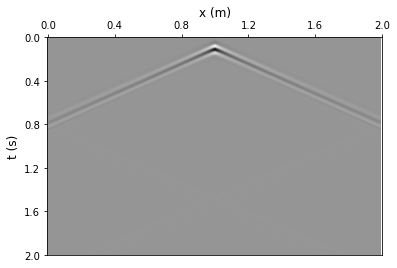

In [9]:
plt.imshow(seis, aspect='auto', cmap='gray')
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('x (m)', fontsize=12)
ax.xaxis.set_label_position('top') 
ax.set_ylabel('t (s)', fontsize=12)
ax.set_yticks(np.arange(0, 2001, 400))
ax.set_yticklabels(np.arange(0, 2001, 400)*dt)
ax.set_xticks(np.arange(0, 201, 40))
ax.set_xticklabels(np.arange(0, 201, 40)*h)
# plt.savefig(f'seis_f0={f0}_h={h}_dt={dt}.png')